title: "Metabolomics exploration"
author: "Adam_Koziol"
date: "2022-10-20"
output: html_document

We'll load all the packages we couldn't install through conda - This can take a long time to run (e.g., 20 minutes)

In [2]:
library(devtools)
install_github("hmsc-r/HMSC")
install_github("andreasmock/MetaboDiff")
install.packages(c("logisticPCA",
                   "vioplot",
                   "colorspace"))

dotCall64  (NA -> 1.0-2  ) [CRAN]
mcmc       (NA -> 0.9-7  ) [CRAN]
coda       (NA -> 0.19-4 ) [CRAN]
maps       (NA -> 3.4.1  ) [CRAN]
spam       (NA -> 2.9-1  ) [CRAN]
truncnorm  (NA -> 1.0-8  ) [CRAN]
pracma     (NA -> 2.4.2  ) [CRAN]
MCMCpack   (NA -> 1.6-3  ) [CRAN]
FNN        (NA -> 1.1.3.1) [CRAN]
fields     (NA -> 14.1   ) [CRAN]
BayesLogit (NA -> 2.1    ) [CRAN]
ape        (NA -> 5.6-2  ) [CRAN]


Installing 12 packages: dotCall64, mcmc, coda, maps, spam, truncnorm, pracma, MCMCpack, FNN, fields, BayesLogit, ape

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



✔  checking for file ‘/tmp/Rtmp72DDi6/remotes5a3e2b70b2b1/hmsc-r-HMSC-56820b1/DESCRIPTION’
─  preparing ‘Hmsc’:
✔  checking DESCRIPTION meta-information
─  installing the package to process help pages
─  saving partial Rd database (17s)
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘Hmsc_3.0-14.tar.gz’
   


bitops       (NA -> 1.0-7    ) [CRAN]
zlibbioc     (NA -> 1.40.0   ) [CRAN]
GenomeInf... (NA -> 1.2.7    ) [CRAN]
RCurl        (NA -> 1.98-1.9 ) [CRAN]
GenomeInfoDb (NA -> 1.30.1   ) [CRAN]
XVector      (NA -> 0.34.0   ) [CRAN]
plogr        (NA -> 0.2.0    ) [CRAN]
Biostrings   (NA -> 2.62.0   ) [CRAN]
png          (NA -> 0.1-7    ) [CRAN]
KEGGREST     (NA -> 1.34.0   ) [CRAN]
S4Vectors    (NA -> 0.32.4   ) [CRAN]
RSQLite      (NA -> 2.2.18   ) [CRAN]
IRanges      (NA -> 2.28.0   ) [CRAN]
BiocGenerics (NA -> 0.40.0   ) [CRAN]
Biobase      (NA -> 2.54.0   ) [CRAN]
XML          (NA -> 3.99-0.12) [CRAN]
Annotatio... (NA -> 1.56.2   ) [CRAN]
quadprog     (NA -> 1.5-8    ) [CRAN]
igraph       (NA -> 1.3.5    ) [CRAN]
fastmatch    (NA -> 1.1-3    ) [CRAN]
deldir       (NA -> 1.0-6    ) [CRAN]
interp       (NA -> 1.1-3    ) [CRAN]
jpeg         (NA -> 0.1-9    ) [CRAN]
checkmate    (NA -> 2.1.0    ) [CRAN]
htmlTable    (NA -> 2.4.1    ) [CRAN]
latticeExtra (NA -> 0.6-30   ) [CRAN]
Formula     

Installing 62 packages: bitops, zlibbioc, GenomeInfoDbData, RCurl, GenomeInfoDb, XVector, plogr, Biostrings, png, KEGGREST, S4Vectors, RSQLite, IRanges, BiocGenerics, Biobase, XML, AnnotationDbi, quadprog, igraph, fastmatch, deldir, interp, jpeg, checkmate, htmlTable, latticeExtra, Formula, preprocessCore, affyio, GlobalOptions, rjson, shape, DelayedArray, GenomicRanges, MatrixGenerics, annotate, plotrix, phangorn, optimParallel, mnormt, expm, combinat, clusterGeneration, GO.db, doParallel, impute, Hmisc, fastcluster, dynamicTreeCut, limma, affy, clue, GetoptLong, circlize, SummarizedExperiment, genefilter, tsne, phytools, WGCNA, vsn, ComplexHeatmap, MultiAssayExperiment

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



✔  checking for file ‘/tmp/Rtmp72DDi6/remotes5a3e52c70e70/andreasmock-MetaboDiff-6b1e31a/DESCRIPTION’
─  preparing ‘MetaboDiff’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘MetaboDiff_0.9.5.tar.gz’
   


also installing the dependencies ‘sm’, ‘zoo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(MetaboDiff)
library(logisticPCA)
library(ggcorrplot)
library(factoextra)
library(ggfortify)
library(pheatmap)
library(ggpubr)
library(vegan)
library(Hmsc)
library(data.table)
library(RCurl)
library(vioplot)
library(colorspace)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects a

Load in all the data files using data.table and RCurl from github

In [4]:
metadata_link <- getURL('https://raw.githubusercontent.com/CCMS-UCSD/GNPSDocumentation/master/docs/tutorials/AG_tutorial_files/metadata_GNPS_table_AMG_key_ones_cleaned.txt')
data_link <- getURL('https://raw.githubusercontent.com/CCMS-UCSD/GNPSDocumentation/master/docs/tutorials/AG_tutorial_files/MZmine-GNPS_AG_test_featuretable.csv')

metadata <- data.table::fread(metadata_link)
data <- data.table::fread(data_link)

We'll start to explore the data by first checing what types of data we're working with in both files - Starting with the metadata

In [5]:
head(metadata)
str(metadata) ##Here we have the metadata and the associated data types, in all cases these are characters which will be converted into factors later                          on. I don't like the use of 'ATTRIBUTE_' as it is redundant so for now lets remove that
metadata <- metadata %>%
  rename_with(~str_remove(., 'ATTRIBUTE_')) %>%
  mutate_all(na_if,"")

filename,ATTRIBUTE_SampleType,ATTRIBUTE_TypesOfPlants,ATTRIBUTE_ExerciceFrequency,ATTRIBUTE_FermentedPlantFrequency,ATTRIBUTE_Probiotic_frequence
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10125_P1_RA12_01_49.mzXML,SAMPLE,21_to_30,Regularly,,
10173_P4_RC5_01_447.mzXML,SAMPLE,11_to_20,Occasionally,Daily,Occasionally
10232_P4_RE4_01_476.mzXML,SAMPLE,Less_than_5,Occasionally,,
10546_P4_RG11_01_515.mzXML,SAMPLE,Less_than_5,Regularly,,
10710_P3_RB12_01_317.mzXML,SAMPLE,11_to_20,Regularly,,
10712_P4_RH3_01_521.mzXML,SAMPLE,More_than_30,Occasionally,,


Classes ‘data.table’ and 'data.frame':	591 obs. of  6 variables:
 $ filename                         : chr  "10125_P1_RA12_01_49.mzXML" "10173_P4_RC5_01_447.mzXML" "10232_P4_RE4_01_476.mzXML" "10546_P4_RG11_01_515.mzXML" ...
 $ ATTRIBUTE_SampleType             : chr  "SAMPLE" "SAMPLE" "SAMPLE" "SAMPLE" ...
 $ ATTRIBUTE_TypesOfPlants          : chr  "21_to_30" "11_to_20" "Less_than_5" "Less_than_5" ...
 $ ATTRIBUTE_ExerciceFrequency      : chr  "Regularly" "Occasionally" "Occasionally" "Regularly" ...
 $ ATTRIBUTE_FermentedPlantFrequency: chr  "" "Daily" "" "" ...
 $ ATTRIBUTE_Probiotic_frequence    : chr  "" "Occasionally" "" "" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [6]:
head(metadata) #looks good

filename,SampleType,TypesOfPlants,ExerciceFrequency,FermentedPlantFrequency,Probiotic_frequence
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10125_P1_RA12_01_49.mzXML,SAMPLE,21_to_30,Regularly,NA,NA
10173_P4_RC5_01_447.mzXML,SAMPLE,11_to_20,Occasionally,Daily,Occasionally
10232_P4_RE4_01_476.mzXML,SAMPLE,Less_than_5,Occasionally,NA,NA
10546_P4_RG11_01_515.mzXML,SAMPLE,Less_than_5,Regularly,NA,NA
10710_P3_RB12_01_317.mzXML,SAMPLE,11_to_20,Regularly,NA,NA
10712_P4_RH3_01_521.mzXML,SAMPLE,More_than_30,Occasionally,NA,NA


In [7]:
pats <- str_c(c('^X','.Peak.area'), collapse = '|')

data <- data %>%
  rename_at(4:length(.), ~str_remove_all(., pats)) %>%
  rename_all(~str_replace(., ' ', '.')) %>%
  mutate(row.ID = as.character(row.ID),
         row.ID = str_c('metab_', row.ID))

head(colnames(data)) ####look good

[1] "row.ID"                     "row.m/z"                   
[3] "row.retention time"         "10232_P4_RE4_01_476.mzXML" 
[5] "10765_P4_RE9_01_482.mzXML"  "10546_P4_RG11_01_515.mzXML"

Now lets do the same with the data file

In [8]:
##Since we only have data from 22 samples in our subset we'll need to subset the metadata to match the data and make sure its in the same order
metadata_subset <- metadata %>%
  filter(filename %in% colnames(data[,4:length(data)])) %>%
  column_to_rownames('filename') %>%
  .[colnames(data[,4:length(data)]),]

We will check for number of blank cells as well, but for convenience here we'll create a function to easily summarise this

In [9]:
my_vec <- colnames(metadata_subset[2:length(metadata_subset)])

summarise_value_counts <- function(df, column){ ####This function takes a dataframe and column, groups it by that column and summarises the number of times each value appears
  df %>%
    group_by(metadata_subset[as.character(column)]) %>%
    summarise(n=n()) %>%
    mutate(source_column = rep(as.character(column))) %>%
    rename_at(1, ~ 'ID') %>%
    as.data.frame()
}

missing_data_list <- map(df=metadata_subset, .x=my_vec, .f=summarise_value_counts) %>%
  as.list(.) %>%
  bind_rows(., .id = "source_column_index")

missing_data_list

###It seems like FermentedPlantFrequency and Priobiotic_frequence are both missing more thann 70% of their data - there are many things we could do here. For example
##Since the data is categorical we could do something like imputation based on K nearest neighbours or alternatively we could sample from the possibilities and
##and assign it with the probability of it occuring. However since it is missing so much data we'll start by excluding the two column with missing data

source_column_index,ID,n,source_column
<chr>,<chr>,<int>,<chr>
1,Less_than_5,11,TypesOfPlants
1,More_than_30,11,TypesOfPlants
2,Daily,3,ExerciceFrequency
2,Occasionally,10,ExerciceFrequency
2,Regularly,9,ExerciceFrequency
3,Daily,1,FermentedPlantFrequency
3,Never,1,FermentedPlantFrequency
3,Rarely (less than once/week),6,FermentedPlantFrequency
3,NA,14,FermentedPlantFrequency


We'll do some imputation for the missing values - however since the missing values are so many i'lld prefer to not use them in the analysis

In [10]:
impute_missing <- function(x){
  y <- table(x)
  x[is.na(x)] <- sample(names(y),sum(is.na(x)),prob=y,replace=T)
  return(x)
} ###Takes the probability within the input column of each unique value and randomly samples from this probability distribution

metadata_subset <- metadata_subset %>%
  mutate_all(na_if,"") %>%
  rownames_to_column('sample_id')

data.table::setDT(metadata_subset)[, Probiotic_frequence := impute_missing(Probiotic_frequence)]
data.table::setDT(metadata_subset)[, FermentedPlantFrequency := impute_missing(FermentedPlantFrequency)]

In [11]:
metadata_subset <- metadata_subset %>%
  as.data.frame(.) %>%
  column_to_rownames('sample_id')
  

imputed_data_list <- map(df=metadata_subset, .x=my_vec, .f=summarise_value_counts) %>%
  as.list(.) %>%
  bind_rows(., .id = "source_column_index")

imputed_data_list

source_column_index,ID,n,source_column
<chr>,<chr>,<int>,<chr>
1,Less_than_5,11,TypesOfPlants
1,More_than_30,11,TypesOfPlants
2,Daily,3,ExerciceFrequency
2,Occasionally,10,ExerciceFrequency
2,Regularly,9,ExerciceFrequency
3,Daily,2,FermentedPlantFrequency
3,Never,4,FermentedPlantFrequency
3,Rarely (less than once/week),16,FermentedPlantFrequency
4,Daily,3,Probiotic_frequence


For the the 'data' dataframe we will double check for no na values as well

row.ID                    row.m/z 
                         0                          0 
        row.retention time  10232_P4_RE4_01_476.mzXML 
                         0                          0 
 10765_P4_RE9_01_482.mzXML 10546_P4_RG11_01_515.mzXML 
                         0                          0 
 11035_P4_RB4_01_431.mzXML 11163_P4_RB11_01_439.mzXML 
                         0                          0 
 13541_P4_RG3_01_506.mzXML  10712_P4_RH3_01_521.mzXML 
                         0                          0 
 10715_P4_RA4_01_415.mzXML  11111_P4_RB1_01_428.mzXML 
                         0                          0 
 14153_P4_RH8_01_526.mzXML  18404_P3_RF6_01_370.mzXML 
                         0                          0 
 16500_P2_RD8_01_209.mzXML 13917_P4_RA10_01_423.mzXML 
                         0                          0 
 16501_P2_RD9_01_210.mzXML  14880_P3_RA3_01_290.mzXML 
                         0                          0 
 15581_P2_RD4_01_203.mzXML  29342_P5_RF3_01_620.mzXML 
                         0                          0 
 15623_P2_RC3_01_187.mzXML   12262_P1_RE5_01_94.mzXML 
                         0                          0 
 27373_P2_RD5_01_204.mzXML  31878_P1_RH3_01_131.mzXML 
                         0                          0 
 14563_P1_RE10_01_99.mzXML 
                         0

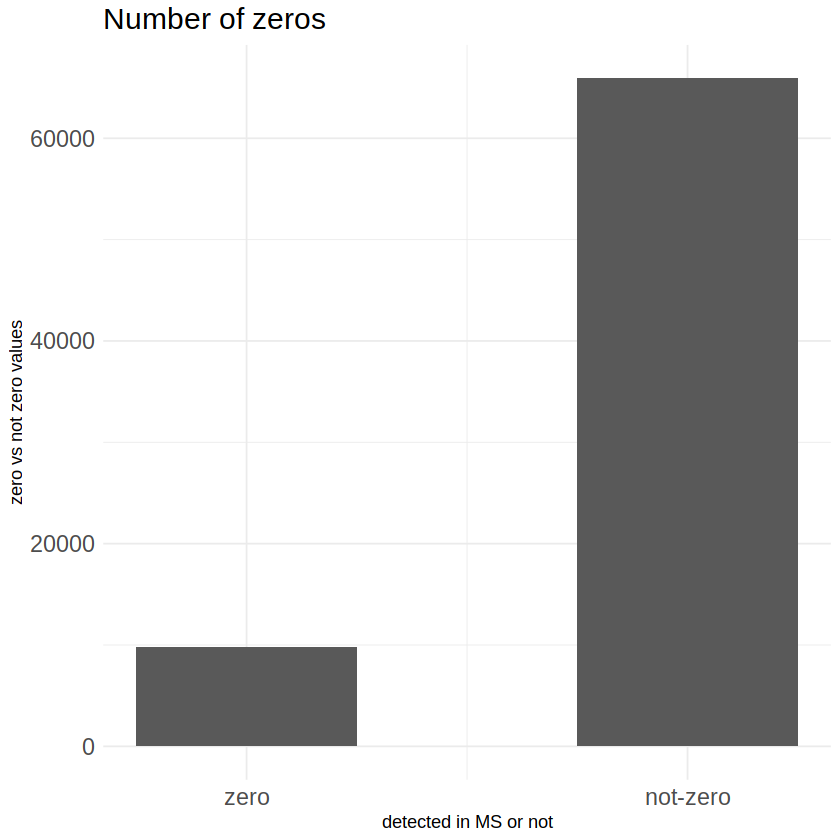

In [12]:
colSums(is.na(data)) ##looks good no NA values

##We can check how the data is distributed as well, its better that the data is in long format for this

data_plot <- data %>%
  pivot_longer(cols = 4:length(.), names_to = 'sample_id', values_to = 'ms_frequency') %>%
  group_by(sample_id) %>%
  mutate(detection = if_else(ms_frequency > 0, 1, 0),
         detection = as.numeric(detection)) %>%
  ggplot(., aes(y=detection, fill = detection, colour = detection)) +
  geom_histogram(binwidth = 0.5, aes(colour=detection)) +
  scale_y_continuous(breaks=c(0, 1),
                     labels = c('zero', 'not-zero')) +
  theme_minimal() +
  ylab('detected in MS or not') +
  xlab('zero vs not zero values') +
  ggtitle('Number of zeros') +
  theme(axis.text = element_text(size = 14),
        plot.title = element_text(size = 18)) +
  coord_flip() #####Most values have values above 0 

data_plot

Before beginning any proper analysis we need to finish the pre-processing with normalizing the data - we'll use the MetaboDiff package to do this and
later some more downstream analysis with this

In [13]:
#############First problem identified was that there is a missing dataframe required which has kegg and pathway information so for this purpose we can make dummy data which i'll take some examples from the liteature and then impute them randomly.

data_da_test <- data[,c(1,4:25)] %>%
  column_to_rownames('row.ID') %>%
  mutate_if(is.numeric, funs(ifelse(. == 0, NA, .)))##Now we have rows with unique metabolite IDs and columns corresponding to samples

####The metadata subset will be our metadata sheet

####We need to create a mock assay sheet which corresponds to our metabolites 
super_path_egs <- c('1-arachidonoylglycerophosphoethanolamine', ####Mock super pathway examples
                    '1-arachidonylglycerol',
                    '1-eicosadienoylglycerophosphocholine',
                    '1-linoleoylglycerol (1-monolinolein)',
                    '1-heptadecanoylglycerophosphoethanolamine*',
                    '1-arachidonoylglycerophosphoethanolamine')

sub_path_egs <- c('lipid metabolism', ####Mock sub pathway examples
                  'Glycolipid',
                  'Fatty Acid and Lipid Metabolism',
                  'Hormone Metabolism',
                  'Polyunsaturated Fatty Acid Metabolism',
                  'Secondary Metabolite Metabolism')

metab_id <-c('Unknown_metabolite', ####Mock metabolite id examples
             'Lysolipid',
             'Monoacylglycerol',
             'Pyrogallol',
             'Deoxycholate')

kegg_eg <- c('K07483; transposase',
             'NA',
             'parA, soj; chromosome partitioning protein',
             'fnr; ferredoxin/flavodoxin---NADP+ reductase [EC:1.18.1.2 1.19.1.1]')

assay_da_test <- as.data.frame(rownames(data_da_test)) %>%
  dplyr::rename('metabolites' = 'rownames(data_da_test)') %>%
  mutate(SUPER_PATHWAY = sample(super_path_egs, size = nrow(.), replace = T),
         SUB_PATHWAY = sample(sub_path_egs, size = nrow(.), replace = T),
         METAB_ID = sample(metab_id, size = nrow(.), replace = T),
         KEGG_ID = sample(kegg_eg, size = nrow(.), replace = T)) %>%
  column_to_rownames('metabolites') ###Ok we've made some dummy data now to give some information about the metabolites

###Check that the correct colnames and rownames match
setdiff(colnames(data_da_test), rownames(metadata_subset)) ##good
setdiff(rownames(data_da_test), rownames(assay_da_test)) ##good

da_obj <- create_mae(assay = data_da_test, colData = metadata_subset[,2:3], rowData = assay_da_test) ##We now have our object for differential analysis testing

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


character(0)

character(0)

Now we can proceed with creating the normalised data-set

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



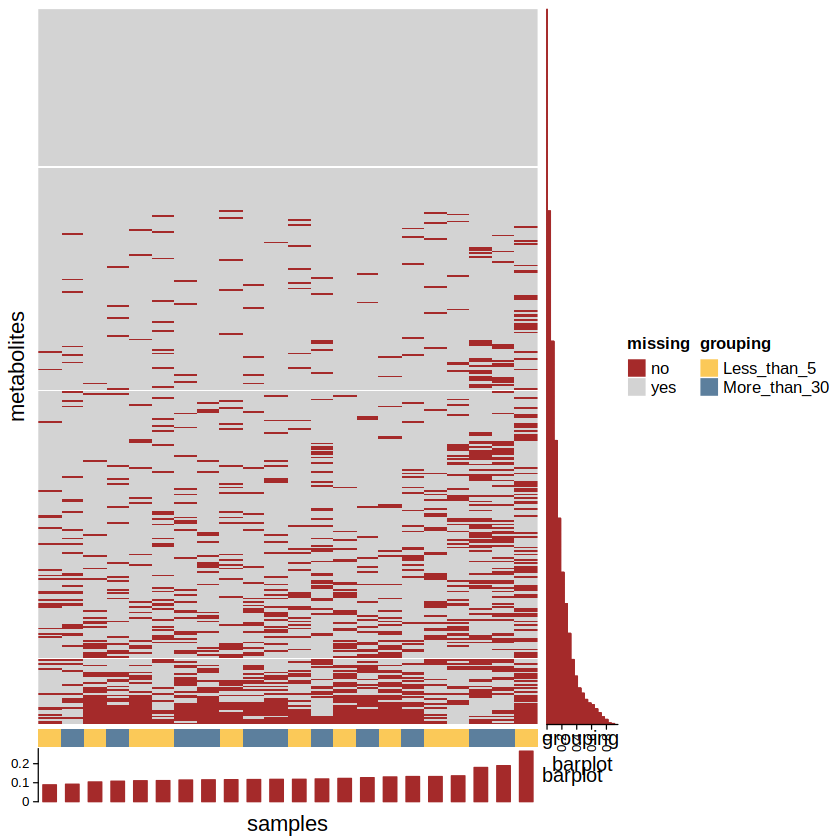

In [14]:
da_obj <- get_SMPDBanno(da_obj,
                        column_kegg_id=4,
                        column_hmdb_id=NA,
                        column_chebi_id=NA)

na_heatmap(da_obj,
           group_factor = 'TypesOfPlants',
           label_colors = c("#fbc958","#5c7f9d")) ###Allows us to see how many metabolites are missing data

In [15]:
da_obj <- knn_impute(da_obj,cutoff=0.4) ###Imputes metabolite information for those without

Cluster size 3210 broken into 3112 98 
Cluster size 3112 broken into 2874 238 
Cluster size 2874 broken into 2716 158 
Cluster size 2716 broken into 41 2675 
Done cluster 41 
Cluster size 2675 broken into 2418 257 
Cluster size 2418 broken into 1055 1363 
Done cluster 1055 
Done cluster 1363 
Done cluster 2418 
Done cluster 257 
Done cluster 2675 
Done cluster 2716 
Done cluster 158 
Done cluster 2874 
Done cluster 238 
Done cluster 3112 
Done cluster 98 


`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



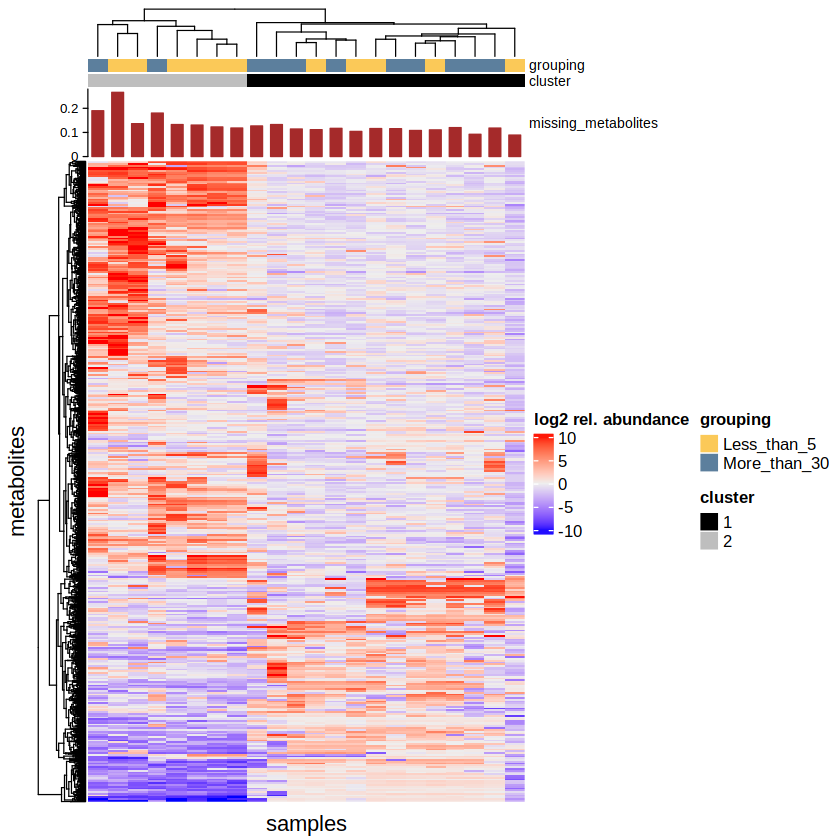

In [16]:
outlier_heatmap(da_obj,
                group_factor = 'TypesOfPlants',
                label_colors = c("#fbc958","#5c7f9d"),
                k=2) ###Clusters look good, there doesnt seem to be any outliers that are undersampled

In [17]:
da_obj <- normalize_met(da_obj) ####Here we can do our variance stabilizing normalisation to maintain the same variance across the spectrum

Warning message:
“'experiments' dropped; see 'metadata'”
harmonizing input:
  removing 66 sampleMap rows not in names(experiments)

Warning message:
“'experiments' dropped; see 'metadata'”
harmonizing input:
  removing 66 sampleMap rows not in names(experiments)

Warning message:
“'experiments' dropped; see 'metadata'”
harmonizing input:
  removing 66 sampleMap rows not in names(experiments)

Warning message:
“'experiments' dropped; see 'metadata'”
harmonizing input:
  removing 66 sampleMap rows not in names(experiments)

Warning message:
“Removed 9832 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9832 rows containing non-finite values (stat_boxplot).”


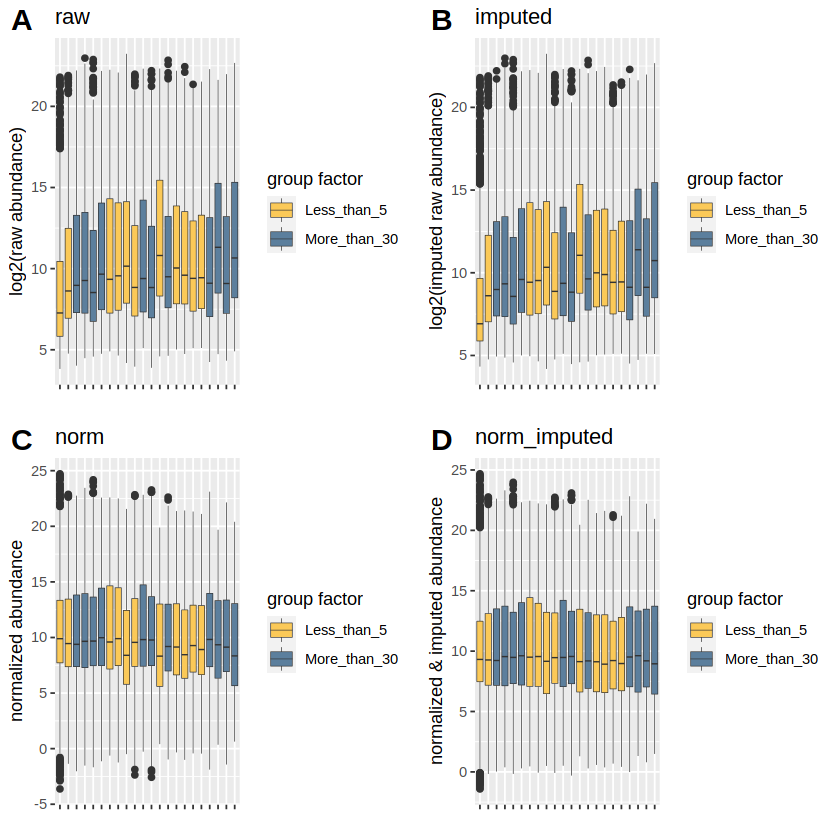

In [18]:
quality_plot(da_obj,
             group_factor="TypesOfPlants",
             label_colors=c("#fbc958","#5c7f9d"))
###We can see that the variance is uniform for both norm and norm_imp data

###Take the normalized data for downstream analysis
data_norm <- as.data.frame(da_obj@ExperimentList@listData[["norm"]]@assays@data@listData[[1]])

First exploratory analysis will be a PCA - this will allow us to interrelate all the data we've gathered from the 22 samples and determine how they orient themselves within a hyperdimensional space

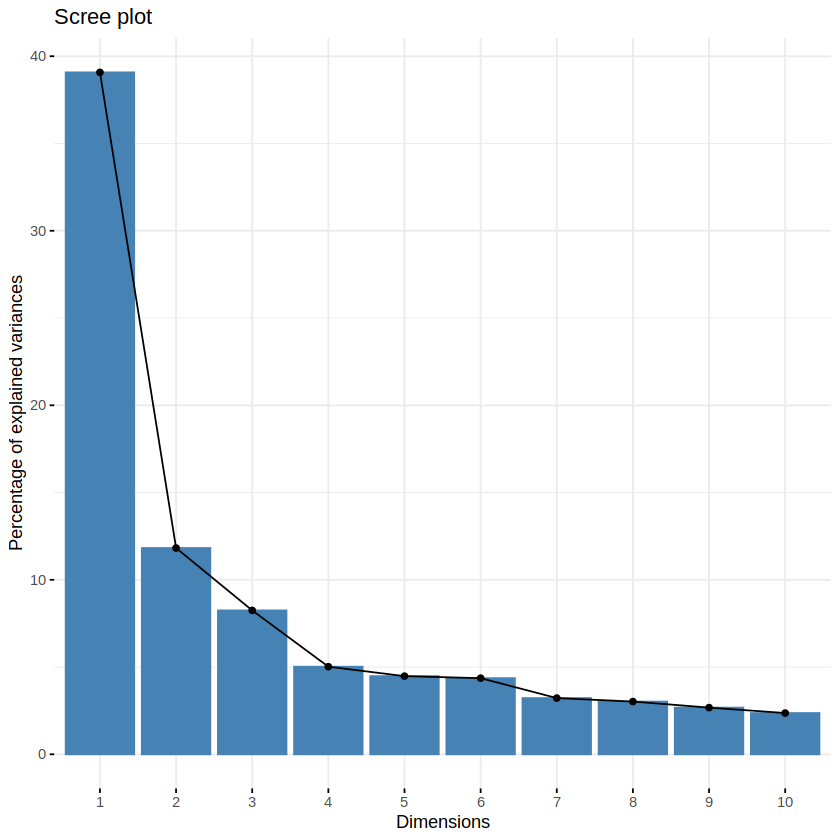

In [19]:
data_t <- data_norm %>%
  t() %>%
  as.data.frame() %>%
  replace(is.na(.), 0) ###For PCA we'll need to change the NAs with zero

module_pca=prcomp(data_t) 

fviz_screeplot(module_pca) ###Screeplot to determine eigenvalue contributions - PCA1 explains ~39% of the variation

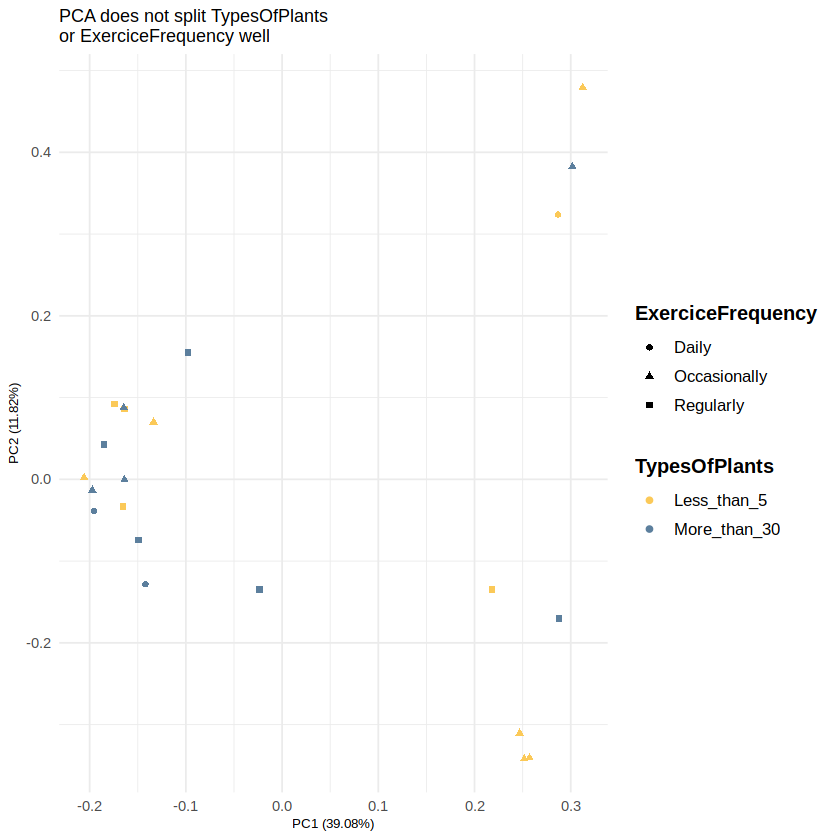

In [20]:
PCA <- autoplot(module_pca, data = metadata_subset, shape = 'ExerciceFrequency', colour = 'TypesOfPlants', loadings = F, loadings.label = F) +
  theme_minimal() +
  scale_colour_manual(values=c("#fbc958","#5c7f9d")) +
  ggtitle('PCA does not split TypesOfPlants\nor ExerciceFrequency well') +
  theme(axis.title = element_text(size = 8),
        legend.text = element_text(size = 10),
        title = element_text(size = 9),
        legend.title = element_text(size = 12,
                                    face = 'bold')) +
  guides(colour = guide_legend(title.position = "top"),
         shape = guide_legend(title.position = 'top'))
  ##Seems like we do have some clustering based on the TypesofPlants consumed. The metabolite profile of people who each more or less plants are more similar to each other

PCA

Warning message in vegdist(., method = "bray"):
“results may be meaningless because data have negative entries
                 in method “bray””


Run 0 stress 0.03985486 
Run 1 stress 0.04475673 
Run 2 stress 0.039705 
... New best solution
... Procrustes: rmse 0.07184229  max resid 0.1877175 
Run 3 stress 0.04446147 
Run 4 stress 0.04992287 
Run 5 stress 0.03970495 
... New best solution
... Procrustes: rmse 0.0001357524  max resid 0.0003282977 
... Similar to previous best
Run 6 stress 0.04611943 
Run 7 stress 0.04611922 
Run 8 stress 0.03985496 
... Procrustes: rmse 0.07189252  max resid 0.1881559 
Run 9 stress 0.03970505 
... Procrustes: rmse 8.899162e-05  max resid 0.0002153851 
... Similar to previous best
Run 10 stress 0.04475665 
Run 11 stress 0.04475671 
Run 12 stress 0.0499232 
Run 13 stress 0.04446164 
Run 14 stress 0.04446161 
Run 15 stress 0.03971946 
... Procrustes: rmse 0.001995592  max resid 0.007204599 
... Similar to previous best
Run 16 stress 0.04970776 
Run 17 stress 0.04615792 
Run 18 stress 0.03971939 
... Procrustes: rmse 0.002034756  max resid 0.007393973 
... Similar to previous best
Run 19 stress 0.049

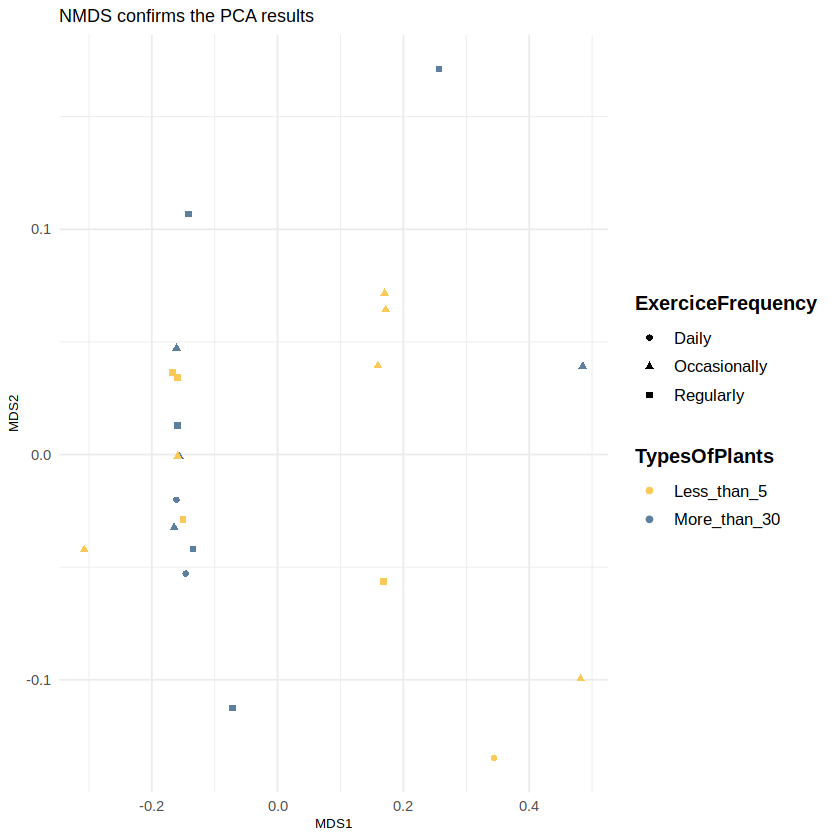

In [21]:
nmds <- data_t %>%
  vegdist(., method = 'bray') %>% 
  metaMDS(., distance = 'bray', k = 2, try = 100) ###As Bray-Curtis transformations cannot have negative values we could
                                                  ###try different dissimilarity techniques to which do accept negative values

nmds <- as.data.frame(nmds$points) %>%
  rownames_to_column('filename') %>%
  left_join(metadata, by = 'filename') %>%
  ggplot(aes(x = MDS1, y = MDS2, fill = TypesOfPlants, colour = TypesOfPlants, shape = ExerciceFrequency)) +
  geom_point() +
  theme_minimal() +
  scale_fill_manual(values=c("#fbc958","#5c7f9d")) +
  scale_colour_manual(values=c("#fbc958","#5c7f9d")) +
  ggtitle('NMDS confirms the PCA results') +
  theme(axis.title = element_text(size = 8),
        legend.text = element_text(size = 10),
        title = element_text(size = 9),
        legend.title = element_text(size = 12,
                                    face = 'bold'))

nmds

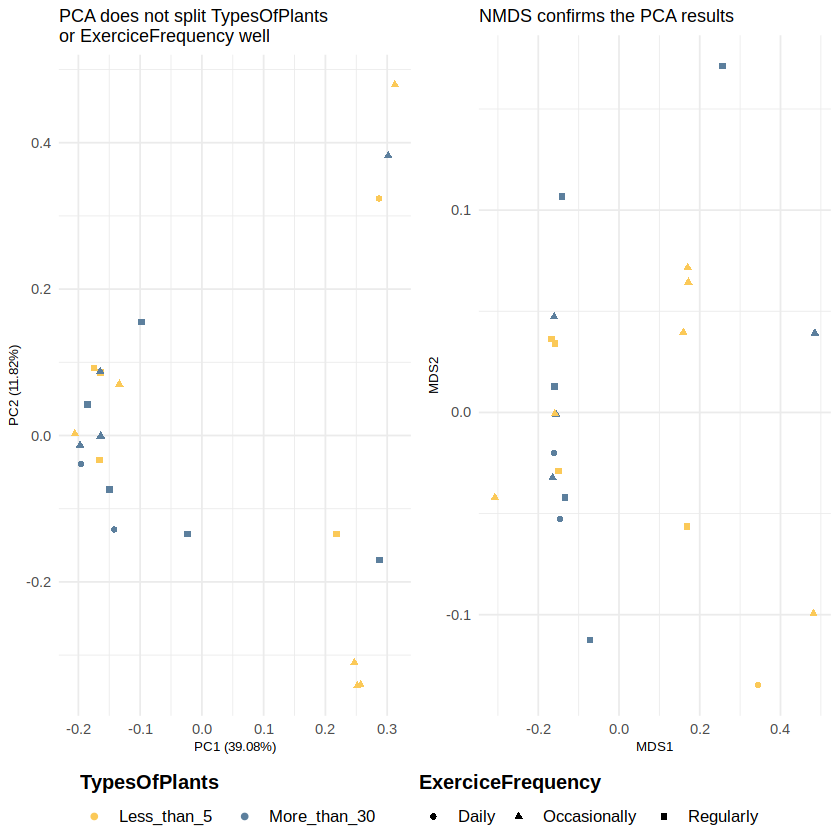

In [22]:
##We'll compare the results of these side by side
ggarrange(PCA, nmds, nrow = 1, common.legend = T, legend = 'bottom')

As we can see, there is some evidence to suggest that certain features of the metabolome can differentiate through the PCA - it might be nice to overlay all of this data in a heatmap and see if the metabolite composition changes with respect to the metadata

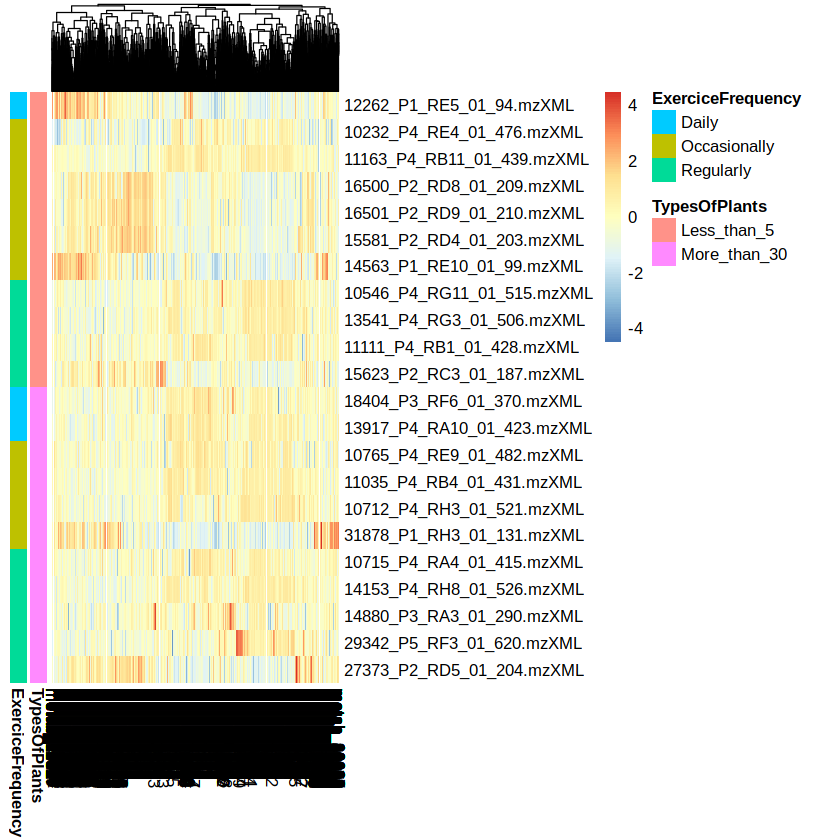

In [23]:
metadata_subset <- metadata_subset %>%
  arrange(TypesOfPlants, ExerciceFrequency)

data_t <- data_t[rownames(metadata_subset),] ###rearrange to be in the same format as the metadata

pheatmap(data_t,
         scale = 'column', ###We'll use z-scores to see how each metabolite changes across samples
         annotation_row = metadata_subset[,2:3],
         cluster_rows = F) ###We can now see how the metabolite profile changes by the two complete metadata sets
                           #we can see some metabolites are clearly giving more of a signal than others here
                           #might be worth seeing which are differentially abundant or not - pick them out and do some predictive modelling with them

Differential abundance testing - between typesofplants it will use the Students t-test using a benjamini hochberg correct.

ExerciseFrequency will use an ANOVA due to more than two levels also corrected with benjamini hochberg

In [24]:
da_obj = diff_test(da_obj,
                group_factors = c("TypesOfPlants","ExerciceFrequency"))

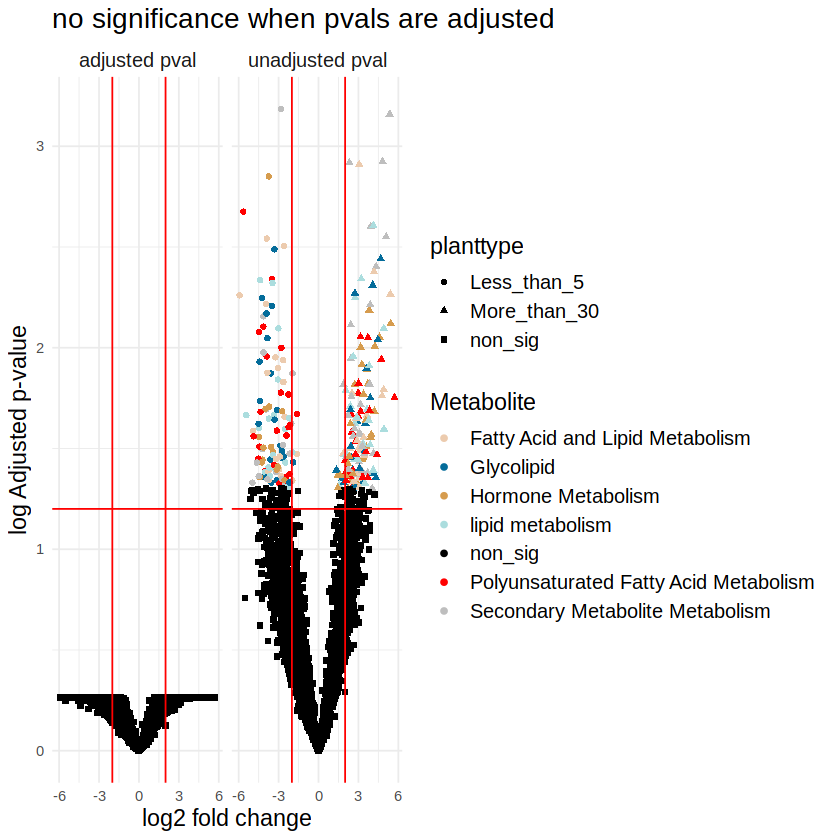

In [25]:
assay_da_test_volc <- assay_da_test %>%
  rownames_to_column('metabolite')

plants <- da_obj@metadata[["ttest_TypesOfPlants_More_than_30_vs_Less_than_5"]] %>%
  pivot_longer(cols = pval:adj_pval, names_to = 'BH_correction_or_nocorrection', values_to = 'significance') %>%
  mutate(planttype = case_when(dm < 0 & significance <= 0.05 ~ 'Less_than_5',
                               dm > 0 & significance <= 0.05 ~ 'More_than_30',
                               T ~ 'non_sig'),
        BH_correction_or_nocorrection = if_else(BH_correction_or_nocorrection == 'pval', 'unadjusted pval', 'adjusted pval')) %>%
  left_join(assay_da_test_volc, by = 'metabolite') %>%
  mutate(SUB_PATHWAY = if_else(planttype == 'non_sig', 'non_sig', SUB_PATHWAY))

ggplot(data=plants, aes(x=dm, y=-log10(significance), shape=planttype, color=SUB_PATHWAY)) +
  facet_wrap(~BH_correction_or_nocorrection) +
  geom_point() +
  scale_colour_manual(values = c("#ECCBAE", "#046C9A", "#D69C4E", "#ABDDDE", "#000000", 'red', 'grey')) +
  theme_minimal() +
  xlab('log2 fold change') +
  ylab('log Adjusted p-value') +
  geom_vline(xintercept=c(-2, 2), col="red") +
  geom_hline(yintercept=1.2, col='red') +
  labs(colour='Metabolite') +
  theme(legend.position = 'right',
        title = element_text(size=14),
        legend.text = element_text(size = 12),
        strip.text = element_text(size = 12)) +
  ggtitle('no significance when pvals are adjusted')

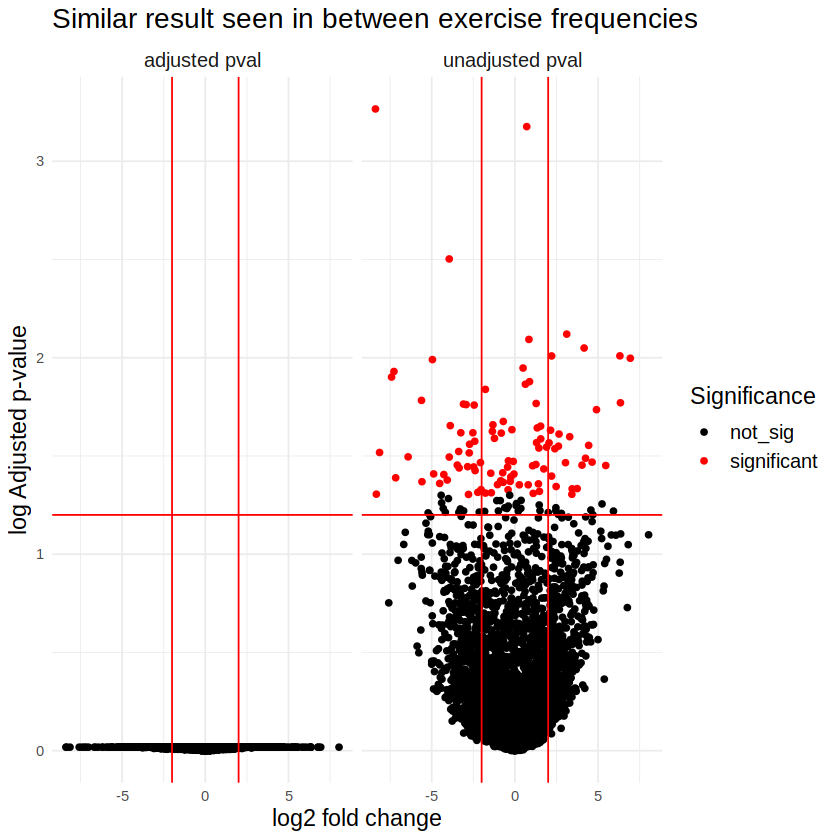

In [26]:
exercise <- da_obj@metadata[["anova_ExerciceFrequency_Daily_vs_Occasionally_vs_Regularly"]] %>%
  pivot_longer(cols = pval:adj_pval, names_to = 'BH_correction_or_nocorrection', values_to = 'significance') %>%
  mutate(da = if_else(significance <= 0.05, 'significant', 'not_sig'),
         BH_correction_or_nocorrection = if_else(BH_correction_or_nocorrection == 'pval', 'unadjusted pval', 'adjusted pval'))

ggplot(data=exercise, aes(x=dm, y=-log10(significance), colour=da)) +
  facet_wrap(~BH_correction_or_nocorrection) +  
  geom_point() +
  scale_colour_manual(values = c('black', "red")) +
  theme_minimal() +
  xlab('log2 fold change') +
  ylab('log Adjusted p-value') +
  geom_vline(xintercept=c(-2, 2), col="red") +
  geom_hline(yintercept=1.2, col='red') +
  labs(colour='Significance') +
  theme(legend.position = 'right',
        title = element_text(size=14),
        legend.text = element_text(size = 12),
        strip.text = element_text(size = 12)) +
  ggtitle('Similar result seen in between exercise frequencies')


####Now that we see there are significant differences, in particular with the TypesOfPlants we can explore this more using generalised multivariate linear mixed effect models

In [27]:
# Y matrix which includes each metabolites recorded intensity - data should not be normalized for this
YData <- data %>%
      column_to_rownames('row.ID') %>%
      dplyr::select(-c('row.m/z', 'row.retention time')) %>%
      t()

# X matrix which includes the metadata we're interested in interrelating
XData=metadata_subset[,2:3]

ncol(YData)

[1] 3443

In [28]:
##Check rownames match for X and Y data
setdiff(rownames(XData), rownames(YData)) ## looks good
##Reorder XData to be in the same order as Ydata
XData <- XData[rownames(YData),]

character(0)

In [29]:
# Y matrix
thresh_abu<-0.005

YData=YData/rowSums(YData)
YData=YData[,apply(YData,2,max)>thresh_abu] ###We have to apply an abundance threshhold - this is because these types of models 
ncol(YData)                                 ###can take a very long time to run (especially locally)
YData=log1p(YData)

head(YData)

[1] 232

,metab_1,metab_2,metab_3,metab_4,metab_6,metab_7,metab_8,metab_11,metab_13,metab_16,⋯,metab_9910,metab_9913,metab_9914,metab_9983,metab_10081,metab_11405,metab_11407,metab_11408,metab_11410,metab_11759
10232_P4_RE4_01_476.mzXML,0.021752189,0.012968099,0.012266644,0.05196937,0.05614224,0.012579117,6.017224e-03,0.04690313,0.004783667,3.322709e-03,⋯,2.104154e-06,9.485252e-07,2.454119e-06,3.123582e-05,1.553382e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.005847640
10765_P4_RE9_01_482.mzXML,0.009331781,0.005864061,0.005396425,0.02375524,0.01933249,0.005081135,4.026394e-05,0.02049061,0.006708017,3.204535e-06,⋯,2.544217e-06,9.012456e-07,3.371516e-05,5.283767e-06,4.262571e-05,2.459438e-06,5.389530e-07,2.350421e-06,7.012464e-07,0.000000000
10546_P4_RG11_01_515.mzXML,0.011697808,0.006777197,0.006561614,0.02759320,0.02947745,0.006241196,3.227897e-02,0.02414682,0.008352889,6.579218e-03,⋯,2.871120e-05,5.384059e-07,2.953549e-05,5.666954e-06,6.053910e-05,9.555554e-07,6.807729e-06,0.000000e+00,4.927084e-07,0.001039223
11035_P4_RB4_01_431.mzXML,0.009983919,0.005551790,0.005550690,0.02845443,0.02098260,0.005437716,2.291320e-02,0.02098239,0.005979878,1.621108e-04,⋯,1.495638e-05,2.133312e-06,2.345794e-05,4.928444e-06,4.122791e-05,1.104350e-06,3.521009e-06,1.035903e-06,4.344802e-07,0.000000000
11163_P4_RB11_01_439.mzXML,0.008408217,0.005340488,0.005131007,0.02597137,0.02368945,0.004663934,6.680904e-03,0.01214757,0.005506137,8.229748e-04,⋯,1.205136e-05,1.010819e-06,2.680187e-05,5.151283e-06,9.034001e-05,5.415242e-07,1.767519e-06,1.062249e-06,1.074077e-06,0.000000000
13541_P4_RG3_01_506.mzXML,0.012384256,0.007632126,0.007293163,0.03611221,0.03294544,0.006771391,1.139554e-02,0.02671107,0.008964374,1.649826e-03,⋯,1.453597e-05,1.183328e-06,3.523583e-05,7.593892e-06,1.823852e-05,1.460516e-06,2.352208e-06,6.863306e-07,4.382330e-07,0.001092129


In [30]:
XData <- XData %>%
  as.data.frame %>%
  rownames_to_column('sample_id') %>%
  mutate(TypesOfPlants = factor(TypesOfPlants, levels=c('Less_than_5',
                                                        'More_than_30')),
         ExerciceFrequency = factor(ExerciceFrequency, levels=c('Occasionally',
                                                               'Regularly',
                                                               'Daily'))) %>%
  column_to_rownames('sample_id')

head(XData)

,TypesOfPlants,ExerciceFrequency
,<fct>,<fct>
10232_P4_RE4_01_476.mzXML,Less_than_5,Occasionally
10765_P4_RE9_01_482.mzXML,More_than_30,Occasionally
10546_P4_RG11_01_515.mzXML,Less_than_5,Regularly
11035_P4_RB4_01_431.mzXML,More_than_30,Occasionally
11163_P4_RB11_01_439.mzXML,Less_than_5,Occasionally
13541_P4_RG3_01_506.mzXML,Less_than_5,Regularly


In [31]:
###Set the XFormula
XFormula=~TypesOfPlants*ExerciceFrequency

In [32]:
model1 = Hmsc(Y=YData,XData=XData, XFormula=XFormula, distr = "normal",YScale = TRUE)

In [33]:
models=list(model1)
modelnames=c("metabolomics")
TH=2

## Fit models
## **********

samples_list = c(250) ###Number of times we sample from each chain
thin_list = c(3) ###Saves every 3rd iteration to reduce correlation from consecutive samples
nChains = 4 ###We'll check for MCMC convergence after 4 chains

###This can take a really long time to run when not on a super computer as it uses MCMC convergence 

for(Lst in 1:length(samples_list)){
  thin = thin_list[Lst]
  samples = samples_list[Lst]
  for(i in 1:length(models)){
    m = sampleMcmc(models[[i]], samples = samples, thin=thin,
                   adaptNf=rep(ceiling(0.4*samples*thin),models[[i]]$nr),
                   transient = ceiling(0.5*samples*thin),
                   nChains = nChains,nParallel = nChains)
  }
}



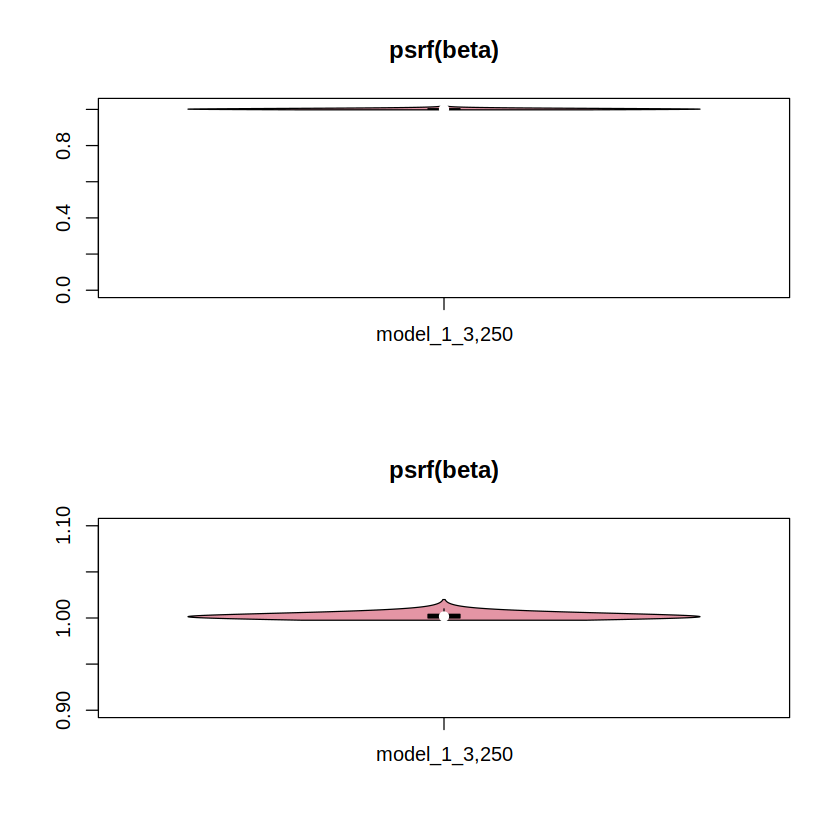

In [34]:
nst = length(thin_list)

ma = NULL
na = NULL
ma_gamma = NULL
na_gamma = NULL
 for (Lst in 1:nst){
  mpost = convertToCodaObject(m, spNamesNumbers = c(T,F), covNamesNumbers = c(T,F))
  psrf.beta = gelman.diag(mpost$Beta,multivariate=FALSE)$psrf
  if(is.null(ma)){
    ma=psrf.beta[,1]
    na = paste0("model_",as.character(i),"_",as.character(thin),",",as.character(samples))
  } else {
    ma = cbind(ma,psrf.beta[,1])
    na = c(na,paste0("model_",as.character(i),"_",as.character(thin),",",as.character(samples)))
  }
   }

par(mfrow=c(2,1))
vioplot(ma,col=rainbow_hcl(1),names=na,ylim=c(0,max(ma)),main="psrf(beta)")
vioplot(ma,col=rainbow_hcl(1),names=na,ylim=c(0.9,1.1),main="psrf(beta)")

#####MCMC chains converged so we've reached a stationary distribution and effectively sampled the posterior distribution

[1] 1.062224

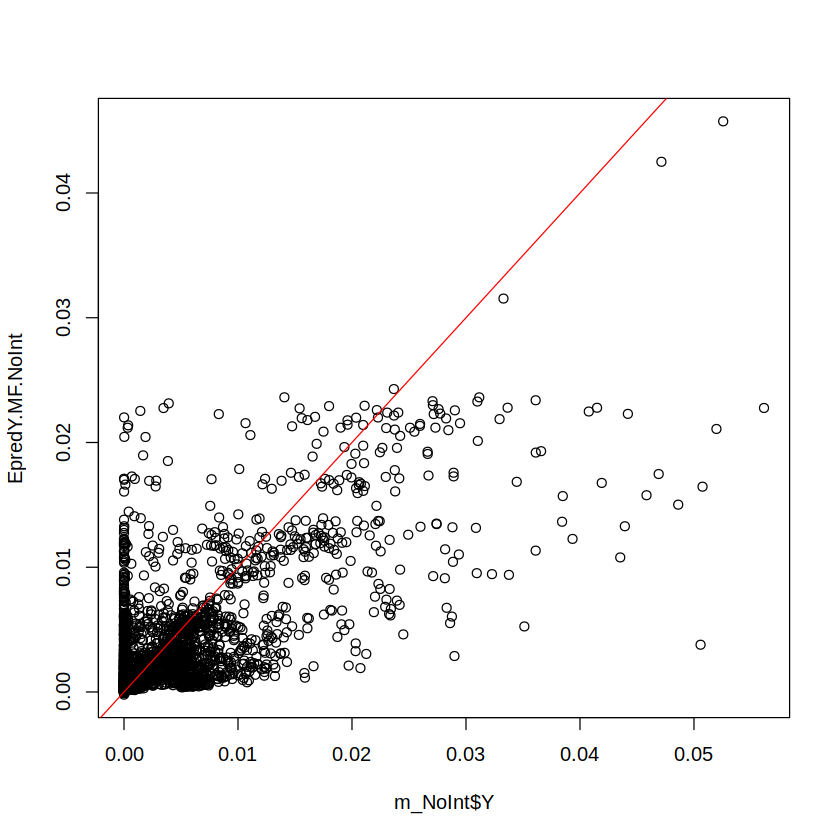

In [35]:
m_NoInt=m
m_NoInt_WAIC=computeWAIC(m_NoInt,byColumn =TRUE)
median(m_NoInt_WAIC,na.rm = TRUE)
predY.MF.NoInt=computePredictedValues(m_NoInt, expected=FALSE)
EpredY.MF.NoInt=apply(predY.MF.NoInt, MARGIN=1:2, mean)
plot(m_NoInt$Y,EpredY.MF.NoInt)
abline(coef = c(0,1),col="red")
MF.NoInt=evaluateModelFit(hM=m_NoInt, predY=predY.MF.NoInt)

####We do have skewed data - most metabolite estimates are low abundance with few that are highly abundant

In [36]:
MF.NoInt$R2= MF.NoInt$R2 %>%
   replace_na(., 0)

mean(MF.NoInt$R2)###R2 is considered quite low ~0.129 suggesting low explanatory power of the metadata with the
##################metabolome - This is likely also due to low replication and potentially a lot of noise in the data

[1] 0.2390704

In [37]:
m=m
betaPost=getPostEstimate(m,"Beta")
gammaPost=getPostEstimate(m,"Gamma")

betaPost_support <- as.data.frame(betaPost[2][1])
betaPost_neg <- as.data.frame(betaPost[3][1])
rownames(betaPost_neg) <- m[['covNames']]
rownames(betaPost_support) <- m[['covNames']]

    
betaPost_start <- betaPost_neg %>%
      rownames_to_column('Treatment') %>%
      pivot_longer(2:length(.), names_to = 'bins', values_to = 'support_neg') %>%
      mutate(bins=str_remove(bins, 'supportNeg.'),
      merger=str_c(bins, Treatment))
    
betaPost_final <- betaPost_support %>%
      as.data.frame() %>%
      rownames_to_column('Treatment') %>%
      pivot_longer(2:length(.), names_to = 'bins', values_to = 'support_pos') %>%
      mutate(bins=str_remove(bins, 'support.'),
             merger=str_c(bins, Treatment)) %>%
      select(c(merger, support_pos)) %>%
      left_join(betaPost_start, by = 'merger') %>%
      mutate(Treatment=factor(Treatment, levels= m[['covNames']]),
             truesupportval = case_when(support_pos >= 0.9 ~ 1,
                                        support_pos <= 0.1 ~ -1,
                                        TRUE ~ 0)) %>%
      select(-c(merger, support_pos, support_neg)) %>%
      pivot_wider(values_from = 'truesupportval', names_from='bins') %>%
      column_to_rownames('Treatment')

In [38]:
metabolome_posterior <- betaPost_final %>%
 rownames_to_column('Factors') %>%
 pivot_longer(2:length(.), names_to = 'metabolites', values_to = 'posterior_support') %>%
 mutate(posterior_support = as.factor(posterior_support))

In [39]:
head(metabolome_posterior)
unique(metabolome_posterior$posterior_support)

Factors,metabolites,posterior_support
<chr>,<chr>,<fct>
(Intercept),metab_1,0
(Intercept),metab_2,0
(Intercept),metab_3,0
(Intercept),metab_4,0
(Intercept),metab_6,0
(Intercept),metab_7,0


[1] 0  -1 1 
Levels: -1 0 1

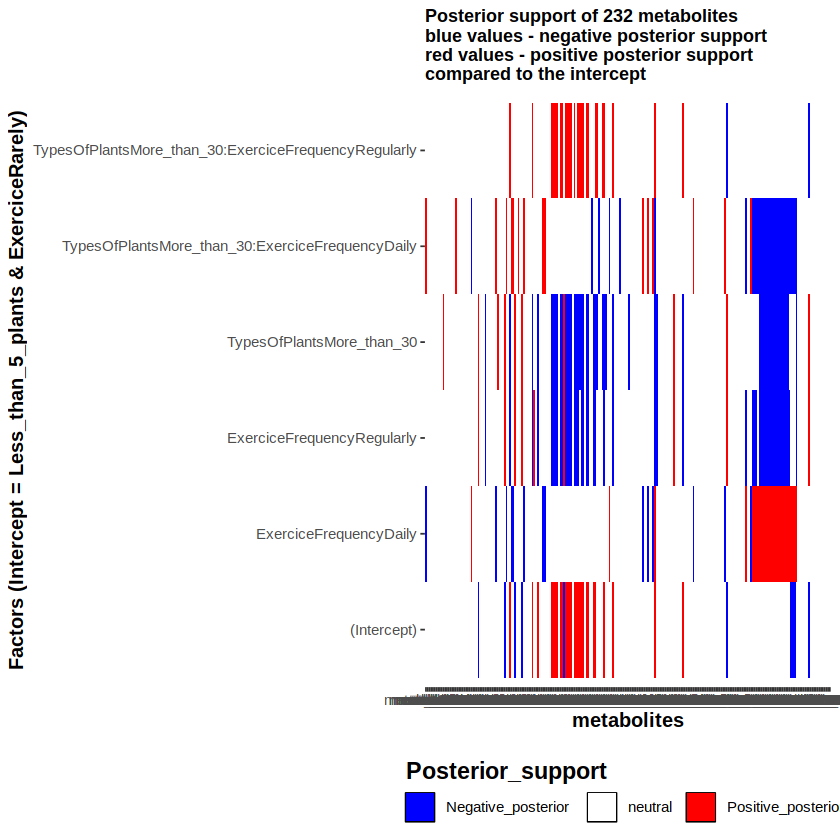

In [40]:
ggplot(metabolome_posterior, aes(x=metabolites, y=Factors, fill=posterior_support)) +
  geom_tile() +
  scale_fill_manual(values=c('blue',
                             'white',
                             'red'),
                    labels=c('-1' ='Negative_posterior',
                             '0' ='neutral',
                             '1' ='Positive_posterior')) +
  theme(panel.background = element_blank(),
        title = element_text(size = 9,
                             face='bold'),
        axis.text.y = element_text(size = 9),
        axis.title = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 9),
        legend.position = 'bottom',
        legend.key=element_rect(colour="black")) +
  ylab('Factors (Intercept = Less_than_5_plants & ExerciceRarely)') +
  guides(fill = guide_legend(title.position = "top")) +
  labs(fill='Posterior_support') +
  ggtitle('Posterior support of 232 metabolites\nblue values - negative posterior support\nred values - positive posterior support\ncompared to the intercept')

Final comments on this data is that we are seeing some trends between the metabolomes and different metadata however as there was a lot of missing data - unevening sampling distributions between levels of the metadata and only 22 samples we would require more replicates and more even sampling distribution in order to better make statistica inferences on the metabolomes between people with different habits.

Thanks for going through my code

In [41]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Linux Mint 20.1

Matrix products: default
BLAS/LAPACK: /home/adam/anaconda3/envs/metab_env_adamkoziol/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] colorspace_2.0-3            vioplot_0.3.7              
 [3] zoo_1.8-11                  sm_2.2-5.7.1               
 [5] RCurl_1.98-1.9              data.table_1.14.4          
 [7] Hmsc_3.0-14                 coda_0.19-4                
 [9] vegan_2.6-4            